In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("HKQuantityTypeIdentifierHeartRateSimpleHealthExportCSV.csv", skiprows=1)

In [19]:
df = df[["startDate", "endDate", "unit", "value", "HKMetadataKeyHeartRateMotionContext"]]

In [20]:
df.head()

,startDate,endDate,unit,value,HKMetadataKeyHeartRateMotionContext
0,2022-04-27 19:48:34 +0000,2022-04-27 19:48:34 +0000,count/min,76.0,0
1,2022-04-27 19:49:36 +0000,2022-04-27 19:49:36 +0000,count/min,79.0,0
2,2022-04-27 19:57:00 +0000,2022-04-27 19:57:00 +0000,count/min,74.0,0
3,2022-04-27 20:02:27 +0000,2022-04-27 20:02:27 +0000,count/min,79.0,0
4,2022-04-27 20:08:53 +0000,2022-04-27 20:08:53 +0000,count/min,74.0,0


In [21]:
timestamp = pd.to_datetime(df["startDate"])

In [22]:
timestamp

0      2022-04-27 19:48:34+00:00
1      2022-04-27 19:49:36+00:00
2      2022-04-27 19:57:00+00:00
3      2022-04-27 20:02:27+00:00
4      2022-04-27 20:08:53+00:00
                  ...           
2907   2022-04-28 21:20:05+00:00
2908   2022-04-28 21:27:46+00:00
2909   2022-04-28 21:31:59+00:00
2910   2022-04-28 21:37:11+00:00
2911   2022-04-28 21:40:22+00:00
Name: startDate, Length: 2912, dtype: datetime64[ns, UTC]

In [23]:
df.insert(0, "timestamp", timestamp)

In [24]:
df

,timestamp,startDate,endDate,unit,value,HKMetadataKeyHeartRateMotionContext
0,2022-04-27 19:48:34+00:00,2022-04-27 19:48:34 +0000,2022-04-27 19:48:34 +0000,count/min,76.0,0
1,2022-04-27 19:49:36+00:00,2022-04-27 19:49:36 +0000,2022-04-27 19:49:36 +0000,count/min,79.0,0
2,2022-04-27 19:57:00+00:00,2022-04-27 19:57:00 +0000,2022-04-27 19:57:00 +0000,count/min,74.0,0
3,2022-04-27 20:02:27+00:00,2022-04-27 20:02:27 +0000,2022-04-27 20:02:27 +0000,count/min,79.0,0
4,2022-04-27 20:08:53+00:00,2022-04-27 20:08:53 +0000,2022-04-27 20:08:53 +0000,count/min,74.0,0
...,...,...,...,...,...,...
2907,2022-04-28 21:20:05+00:00,2022-04-28 21:20:05 +0000,2022-04-28 21:20:05 +0000,count/min,65.0,0
2908,2022-04-28 21:27:46+00:00,2022-04-28 21:27:46 +0000,2022-04-28 21:27:46 +0000,count/min,63.0,0
2909,2022-04-28 21:31:59+00:00,2022-04-28 21:31:59 +0000,2022-04-28 21:31:59 +0000,count/min,67.0,0
2910,2022-04-28 21:37:11+00:00,2022-04-28 21:37:11 +0000,2022-04-28 21:37:11 +0000,count/min,65.0,0


In [25]:
df = df.set_index("timestamp")

In [26]:
df

,startDate,endDate,unit,value,HKMetadataKeyHeartRateMotionContext
timestamp,,,,,
2022-04-27 19:48:34+00:00,2022-04-27 19:48:34 +0000,2022-04-27 19:48:34 +0000,count/min,76.0,0
2022-04-27 19:49:36+00:00,2022-04-27 19:49:36 +0000,2022-04-27 19:49:36 +0000,count/min,79.0,0
2022-04-27 19:57:00+00:00,2022-04-27 19:57:00 +0000,2022-04-27 19:57:00 +0000,count/min,74.0,0
2022-04-27 20:02:27+00:00,2022-04-27 20:02:27 +0000,2022-04-27 20:02:27 +0000,count/min,79.0,0
2022-04-27 20:08:53+00:00,2022-04-27 20:08:53 +0000,2022-04-27 20:08:53 +0000,count/min,74.0,0
...,...,...,...,...,...
2022-04-28 21:20:05+00:00,2022-04-28 21:20:05 +0000,2022-04-28 21:20:05 +0000,count/min,65.0,0
2022-04-28 21:27:46+00:00,2022-04-28 21:27:46 +0000,2022-04-28 21:27:46 +0000,count/min,63.0,0
2022-04-28 21:31:59+00:00,2022-04-28 21:31:59 +0000,2022-04-28 21:31:59 +0000,count/min,67.0,0


In [27]:
rr_interval = 60000 / df["value"]

In [28]:
rr_interval

timestamp
2022-04-27 19:48:34+00:00    789.473684
2022-04-27 19:49:36+00:00    759.493671
2022-04-27 19:57:00+00:00    810.810811
2022-04-27 20:02:27+00:00    759.493671
2022-04-27 20:08:53+00:00    810.810811
                                ...    
2022-04-28 21:20:05+00:00    923.076923
2022-04-28 21:27:46+00:00    952.380952
2022-04-28 21:31:59+00:00    895.522388
2022-04-28 21:37:11+00:00    923.076923
2022-04-28 21:40:22+00:00    952.380952
Name: value, Length: 2912, dtype: float64

In [30]:
df.insert(4, "rr_interval", rr_interval)

In [31]:
df

,startDate,endDate,unit,value,rr_interval,HKMetadataKeyHeartRateMotionContext
timestamp,,,,,,
2022-04-27 19:48:34+00:00,2022-04-27 19:48:34 +0000,2022-04-27 19:48:34 +0000,count/min,76.0,789.473684,0
2022-04-27 19:49:36+00:00,2022-04-27 19:49:36 +0000,2022-04-27 19:49:36 +0000,count/min,79.0,759.493671,0
2022-04-27 19:57:00+00:00,2022-04-27 19:57:00 +0000,2022-04-27 19:57:00 +0000,count/min,74.0,810.810811,0
2022-04-27 20:02:27+00:00,2022-04-27 20:02:27 +0000,2022-04-27 20:02:27 +0000,count/min,79.0,759.493671,0
2022-04-27 20:08:53+00:00,2022-04-27 20:08:53 +0000,2022-04-27 20:08:53 +0000,count/min,74.0,810.810811,0
...,...,...,...,...,...,...
2022-04-28 21:20:05+00:00,2022-04-28 21:20:05 +0000,2022-04-28 21:20:05 +0000,count/min,65.0,923.076923,0
2022-04-28 21:27:46+00:00,2022-04-28 21:27:46 +0000,2022-04-28 21:27:46 +0000,count/min,63.0,952.380952,0
2022-04-28 21:31:59+00:00,2022-04-28 21:31:59 +0000,2022-04-28 21:31:59 +0000,count/min,67.0,895.522388,0


<AxesSubplot:>

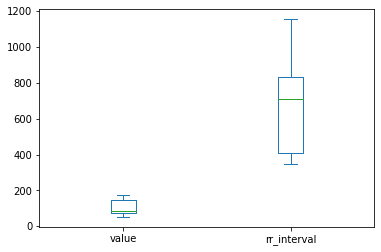

In [35]:
df[["value", "rr_interval"]].plot.box()

<AxesSubplot:xlabel='value', ylabel='rr_interval'>

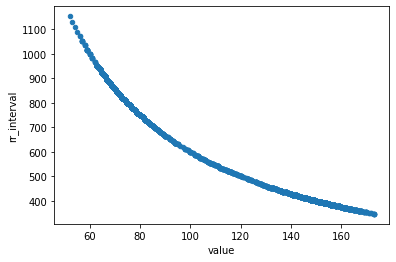

In [38]:
df.plot.scatter(x="value", y="rr_interval")

<AxesSubplot:xlabel='timestamp'>

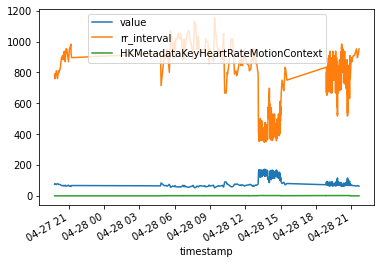

In [39]:
df.plot.line()

In [ ]:
sdnn = []
for row in df.itertuples():
    sdnn.append(df[row.Index - pd.to_timedelta("1 min") : row.Index]["rr_interval"].std())
